# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
%pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [11]:
%pip install python-dotenv
import os
from dotenv import load_dotenv
from huggingface_hub import notebook_login

load_dotenv()
HF_AGENTS_COURSE=os.getenv("HF_TOKEN")

notebook_login()

Note: you may need to restart the kernel to use updated packages.


Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [3]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City? Add also the punctuation of      │
│ every other catering service in descending order                                                                │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(f"Highest-rated catering service: {highest_rated_catering_service}")                                       
                                                                                                                   
  # Now, collect all catering services                                                                             
  all_catering_services = catering_service_tool(query="all catering services in Gotham City")                      
  print(f"All catering services: {all_catering_services}")                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Highest-rated catering service: Gotham Catering Co.
All catering services: Gotham Catering Co.

Out: None

[Step 0: Duration 7.27 seconds| Input tokens: 2,089 | Output tokens: 141]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer({                                                                                                   
      "highest_rated_catering_service": "Gotham Catering Co.",                                                     
      "other_catering_services": {}                                                                                
  })                                                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: {'highest_rated_catering_service': 'Gotham Catering Co.', 'other_catering_services': {}}

[Step 1: Duration 4.64 seconds| Input tokens: 4,487 | Output tokens: 232]

{'highest_rated_catering_service': 'Gotham Catering Co.', 'other_catering_services': {}}


In [5]:
# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool() -> dict[str, float]:
    """
    Returns the highest-rated catering services in Gotham City.

    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.3,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 5.0,
    }

    return services


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City? Add also the score of every other catering service ranked in descending order"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City? Add also the score of every      │
│ other catering service ranked in descending order                                                               │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  catering_services = catering_service_tool()                                                                      
  print(catering_services)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
{'Gotham Catering Co.': 4.3, 'Wayne Manor Catering': 4.8, 'Gotham City Events': 5.0}

Out: None

[Step 0: Duration 0.27 seconds| Input tokens: 2,067 | Output tokens: 73]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Parse the observation data                                                                                     
  import ast                                                                                                       
                                                                                                                   
  # Convert the string representation of the dictionary to an actual dictionary                                    
  catering_services = ast.literal_eval('{"Gotham Catering Co.": 4.3, "Wayne Manor Catering": 4.8, "Gotham City     
  Events": 5.0}')                                                                                                  
                                                                                                                   
  # Find the highest-rated service                                                                                 
  highest_rated_service = max(catering_services, key=catering_services.get)                                        
  highest_rating = catering_services.pop(highest_rated_service)                                                    
                                                                                                                   
  # Sort remaining services by rating in descending order                                                          
  sorted_services = sorted(catering_services.items(), key=lambda item: item[1], reverse=True)                      
                                                                                                                   
  # Prepare the final answer                                                                                       
  answer = f"The highest-rated catering service in Gotham City is {highest_rated_service} with a rating of         
  {highest_rating}. Other services in descending order of ratings are:"                                            
  for service, rating in sorted_services:                                                                          
      answer += f" {service} ({rating}),"                                                                          
  answer = answer.rstrip(',')                                                                                      
                                                                                                                   
  final_answer(answer)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Warning to user: Code execution failed due to an unauthorized import - Consider passing said import under 
`additional_authorized_imports` when initializing your CodeAgent.

Code execution failed at line 'import ast' due to: InterpreterError: Import of ast is not allowed. Authorized 
imports are: ['re', 'queue', 'stat', 'unicodedata', 'time', 'itertools', 'statistics', 'random', 'math', 
'collections', 'datetime']

[Step 1: Duration 12.41 seconds| Input tokens: 4,325 | Output tokens: 324]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Manually parse the observation data                                                                            
  catering_services = {'Gotham Catering Co.': 4.3, 'Wayne Manor Catering': 4.8, 'Gotham City Events': 5.0}         
                                                                                                                   
  # Find the highest-rated service                                                                                 
  highest_rated_service = max(catering_services, key=catering_services.get)                                        
  highest_rating = catering_services.pop(highest_rated_service)                                                    
                                                                                                                   
  # Sort remaining services by rating in descending order                                                          
  sorted_services = sorted(catering_services.items(), key=lambda item: item[1], reverse=True)                      
                                                                                                                   
  # Prepare the final answer                                                                                       
  answer = f"The highest-rated catering service in Gotham City is {highest_rated_service} with a rating of         
  {highest_rating}. Other services in descending order of ratings are:"                                            
  for service, rating in sorted_services:                                                                          
      answer += f" {service} ({rating}),"                                                                          
  answer = answer.rstrip(',')                                                                                      
                                                                                                                   
  final_answer(answer)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: The highest-rated catering service in Gotham City is Gotham City Events with a rating of 5.0. 
Other services in descending order of ratings are: Wayne Manor Catering (4.8), Gotham Catering Co. (4.3)

[Step 2: Duration 20.47 seconds| Input tokens: 7,203 | Output tokens: 573]

The highest-rated catering service in Gotham City is Gotham City Events with a rating of 5.0. Other services in descending order of ratings are: Wayne Manor Catering (4.8), Gotham Catering Co. (4.3)


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [6]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category="villain masquerade")                                      
  print(theme_idea)                                                                                                
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 0: Duration 3.48 seconds| Input tokens: 2,113 | Output tokens: 64]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme_idea = superhero_party_theme_generator(category="villain masquerade")                                      
  print("Theme Idea:", theme_idea)                                                                                 
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Theme Idea: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 3.86 seconds| Input tokens: 4,400 | Output tokens: 135]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 2: Duration 4.35 seconds| Input tokens: 6,873 | Output tokens: 197]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


In [10]:
from email import message_from_binary_file
from tabnanny import verbose
from smolagents import Tool, CodeAgent, HfApiModel

class MySuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    Suggests provides available party themes for designing parties (if no category argument is provided) and, when it a category
    is provided, it suggests a single creative superhero-themed party idea. As final answer mix the text of the idea you got
    with your own evoked thoughs on the theme to give a glamourous description."""

    inputs = {
        "category": {
            "type": "any",
            "description": "Optionally the type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
            "nullable": True
        }
    }

    output_type = "any"

    def forward(self, category: str | None = None):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }
        if not category:
            return ", ".join(list(themes.keys()))

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic gotham'.")

# Instantiate the tool
my_party_theme_tool = MySuperheroPartyThemeTool()
agent = CodeAgent(tools=[my_party_theme_tool], model=HfApiModel(), verbosity_level=2, max_steps=10)

# Run the agent to generate a party theme idea
result = agent.run(
    "Get options for a superhero party and then suggest what would be a good idea for the theme category you think is best"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Get options for a superhero party and then suggest what would be a good idea for the theme category you think   │
│ is best                                                                                                         │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: Let's first get a list of superhero party themes without specifying any category. Then, I will analyze the
options and choose a category I think would be best, such as 'classic heroes', 'villain masquerade', or 'futuristic
Gotham'. After that, I'll request a specific theme idea for that category.                                         
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
party_themes = superhero_party_theme_generator()                                                                   
print(party_themes)                                                                                                
```<end_code>                                                                                                      
                                                                                                                   
Observation:                                                                                                       
                                                                                                                   

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_themes = superhero_party_theme_generator()                                                                 
  print(party_themes)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
classic heroes, villain masquerade, futuristic gotham

Out: None

[Step 0: Duration 0.13 seconds| Input tokens: 2,170 | Output tokens: 97]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: The superhero party theme categories provided are 'classic heroes', 'villain masquerade', and 'futuristic 
Gotham'. Among these, 'futuristic Gotham' seems particularly intriguing as it allows for an innovative and visually
appealing theme that differs from the traditional superhero wear. Let's get a specific theme idea for 'futuristic  
Gotham'.                                                                                                           
                                                                                                                   
Code:                                                                                                              
```py                                                                                                              
futuristic_gotham_theme = superhero_party_theme_generator(category='futuristic gotham')                            
print(futuristic_gotham_theme)                                                                                     
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  futuristic_gotham_theme = superhero_party_theme_generator(category='futuristic gotham')                          
  print(futuristic_gotham_theme)                                                                                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets.

Out: None

[Step 1: Duration 4.95 seconds| Input tokens: 4,531 | Output tokens: 209]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Output message of the LLM: ────────────────────────────────────────────────────────────────────────────────────────
Thought: The theme "Neo-Gotham Night" sounds fantastic! It captures the essence of a futuristic Gotham with a      
cyberpunk aesthetic. The neon decorations and futuristic gadgets will provide an impressive and unique party       
atmosphere. Based on this idea, I can vividly imagine a scene from Batman Beyond: sleek, high-tech decor,          
holograms, virtual reality setups, neon lights, and a bustling futuristic ambiance. This should make for an        
unforgettable superhero party experience.                                                                          
                                                                                                                   
Final Answer: For the superhero party, I suggest you choose the "futuristic Gotham" category and go with the theme 
idea "Neo-Gotham Night." The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and futuristic
gadgets will create a unique and exciting atmosphere.                                                              
Code:                                                                                                              
```py                                                                                                              
final_answer("For the superhero party, I suggest you choose the 'futuristic Gotham' category and go with the theme 
idea 'Neo-Gotham Night.' The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and futuristic
gadgets will create a unique and exciting atmosphere.")                                                            
```<end_code>                                                                                                      

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("For the superhero party, I suggest you choose the 'futuristic Gotham' category and go with the     
  theme idea 'Neo-Gotham Night.' The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and   
  futuristic gadgets will create a unique and exciting atmosphere.")                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: For the superhero party, I suggest you choose the 'futuristic Gotham' category and go with the 
theme idea 'Neo-Gotham Night.' The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and 
futuristic gadgets will create a unique and exciting atmosphere.

[Step 2: Duration 9.84 seconds| Input tokens: 7,124 | Output tokens: 426]

For the superhero party, I suggest you choose the 'futuristic Gotham' category and go with the theme idea 'Neo-Gotham Night.' The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and futuristic gadgets will create a unique and exciting atmosphere.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [13]:

your_username = "francisco-perez-sorrosal"
my_party_theme_tool.push_to_hub(f"{your_username}/my_catering_service_tool", token=HF_AGENTS_COURSE)

README.md:   0%|          | 0.00/243 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/francisco-perez-sorrosal/my_catering_service_tool/commit/46331e99cf8054db4366246ef8e8af2ee7fce4d2', commit_message='Upload tool', commit_description='', oid='46331e99cf8054db4366246ef8e8af2ee7fce4d2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/francisco-perez-sorrosal/my_catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='francisco-perez-sorrosal/my_catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

In [14]:
result

"For the superhero party, I suggest you choose the 'futuristic Gotham' category and go with the theme idea 'Neo-Gotham Night.' The cyberpunk-style party, inspired by Batman Beyond, with neon decorations and futuristic gadgets will create a unique and exciting atmosphere."

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image for a party inspired on the following description: For the superhero party, I suggest you     │
│ choose the 'futuristic Gotham' category and go with the theme idea 'Neo-Gotham Night.' The cyberpunk-style      │
│ party, inspired by Batman Beyond, with neon decorations and futuristic gadgets will create a unique and         │
│ exciting atmosphere. Add neons to show it's a party. Make sure the neon are properly written                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A futuristic Gotham party scene with a cyberpunk vibe inspired by Batman Beyond. The scene is vibrant  
  with neon lights and gadgets, showing off the night's excitement. The neon signs and lights are prominently      
  displayed to indicate it's a party atmosphere."                                                                  
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x127216750>

[Step 0: Duration 14.94 seconds| Input tokens: 2,172 | Output tokens: 135]

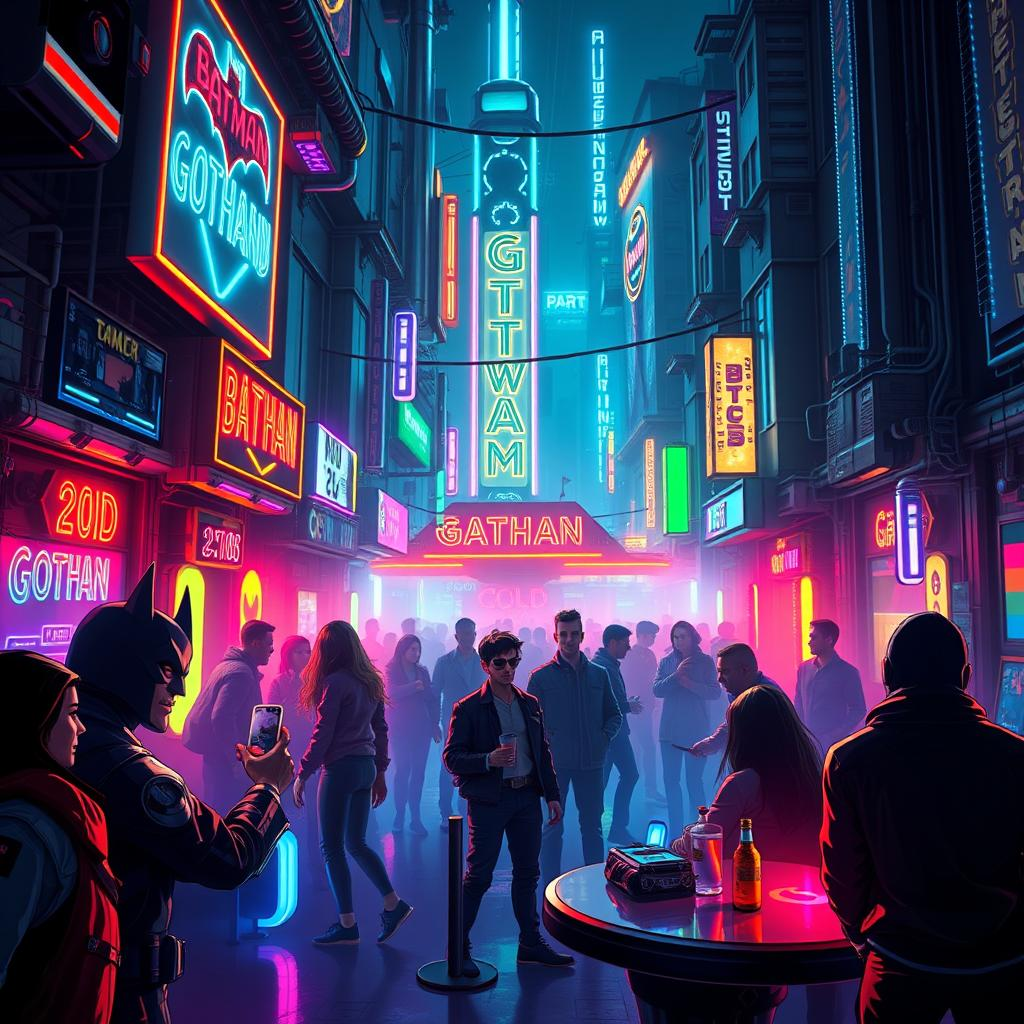

In [18]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

# agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")
agent.run(f"Generate an image for a party inspired on the following description: {result} Add neons to show it's a party. Make sure the neon are properly written")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [19]:
%pip install gradio_client

Note: you may need to restart the kernel to use updated packages.


In [21]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    # additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
    additional_args={'user_prompt': f"Generate an image for a party inspired on the following description: {result} Add neons to show it's a party. Make sure the neon are properly written"}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


Since `api_name` was not defined, it was automatically set to the first available API: `/infer`.


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': "Generate an image for a party inspired on the following description: For the superhero party,  │
│ I suggest you choose the 'futuristic Gotham' category and go with the theme idea 'Neo-Gotham Night.' The        │
│ cyberpunk-style party, inspired by Batman Beyond, with neon decorations and futuristic gadgets will create a    │
│ unique and exciting atmosphere. Add neons to show it's a party. Make sure the neon are properly written"}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  improved_prompt = """                                                                                            
  Create an image for a superhero party with a 'Neo-Gotham Night' theme, inspired by Batman Beyond. The party      
  should have a cyberpunk-style aesthetic with neon decorations and futuristic gadgets. Ensure the neon elements   
  are prominent and legible. The image should convey a unique and exciting atmosphere.                             
  """                                                                                                              
  print(improved_prompt)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:

Create an image for a superhero party with a 'Neo-Gotham Night' theme, inspired by Batman Beyond. The party should 
have a cyberpunk-style aesthetic with neon decorations and futuristic gadgets. Ensure the neon elements are 
prominent and legible. The image should convey a unique and exciting atmosphere.


Out: None

[Step 0: Duration 5.73 seconds| Input tokens: 2,173 | Output tokens: 115]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: 
/private/var/folders/x5/pt_h187j3px6_b1dh6fc74kr0000gn/T/gradio/a820db070a3d0299c9d06ef1662a2e4291f5c261995a61bd183
5f825587a7cef/image.webp

[Step 1: Duration 9.52 seconds| Input tokens: 4,660 | Output tokens: 169]

'/private/var/folders/x5/pt_h187j3px6_b1dh6fc74kr0000gn/T/gradio/a820db070a3d0299c9d06ef1662a2e4291f5c261995a61bd1835f825587a7cef/image.webp'

Note: you may need to restart the kernel to use updated packages.


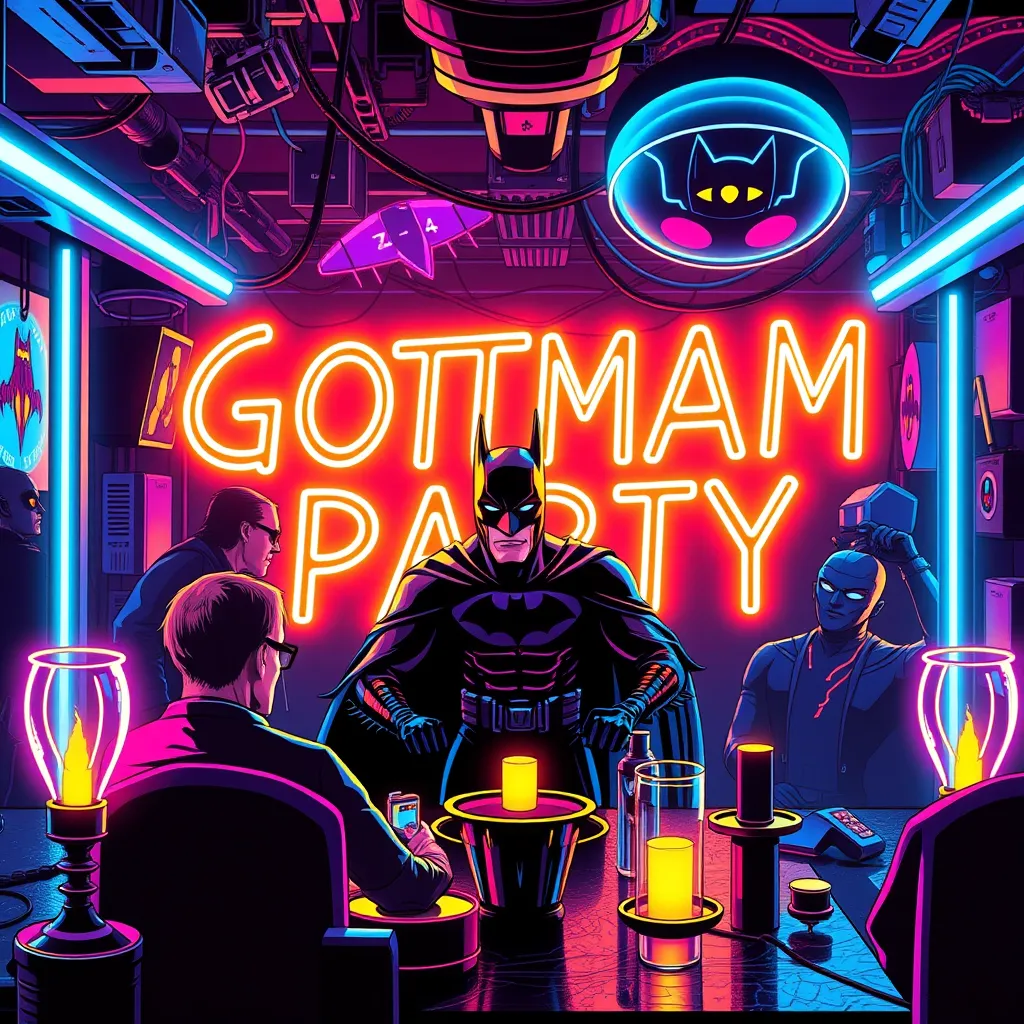

In [25]:
%pip install matplotlib
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/private/var/folders/x5/pt_h187j3px6_b1dh6fc74kr0000gn/T/gradio/a820db070a3d0299c9d06ef1662a2e4291f5c261995a61bd1835f825587a7cef/image.webp'

img = PILImage.open(image_path)
img

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [26]:
%pip install langchain-community google-search-results

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 50.9 MB/s eta 0:00:0031m52.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00MB/s eta 0:00:01
Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl (54 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.7/633.7 kB 34.2 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32063 sha256=d76a3aa47c504087ff0a53e27c08aef158976bfee3610c3053dfccfc02aadd5e
  Stored in directory: /Users/fper

In [34]:
# from google.colab import userdata
import os
load_dotenv()
# os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')
os.environ['SERPAPI_API_KEY'] = os.getenv('SERPAPI_API_KEY')

In [37]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences, along with the URLs where I can find more information about them")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences, along with the URLs where I can find more information about them                                   │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Perform a search for luxury superhero-themed entertainment ideas                                               
  entertainment_ideas = search(query="luxury superhero-themed entertainment ideas")                                
                                                                                                                   
  # Print the search results for analysis                                                                          
  print(entertainment_ideas)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', 'Superhero Party Ideas. Awesome ideas for your next Superhero Party | 
Decorations | Food | Games | Activities | Toys | Costumes | Crafts.', "For Amazon's new series The Tick, custom 
props and decor incorporated superhero nuances in a playful way.", 'Batman Birthday Party Candy Buffet Ideas | 
Little Dimple Designs · Captain America Deluxe Boys Costume · Marvel Carnage Morphsuit Mens Costume.', 'LED Battery
Operated Lights · Basket Filler · Superhero Mini Buttons (pins) · Fringed Door Curtains · Large Superhero Signs · 
Small Superhero Signs ...', 'Discover your inner superhero in our dress-up wardrobe and grab your favorite mask, 
cape, dress and accessories to let your hidden superpowers shine! They have it all and organized a perfect party 
experience in such a friendly and welcoming way, even with all my special game requirements.', 'Get creative with 
superhero-themed balloon columns for an epic birthday celebration. Transform your space into a superhero haven with
these ...', 'Include activities like crawling through tunnels, jumping over “buildings” (boxes), balancing on a 
“tightrope” (rope or tape), and throwing soft ...', "Our children's Superhero Party Entertainment includes a range 
of interactive games and activities, such as superhero training and bubble popping, musical games."]

Out: None

[Step 0: Duration 3.96 seconds| Input tokens: 2,094 | Output tokens: 87]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Perform a refined search for luxury superhero-themed entertainment ideas with URLs                             
  entertainment_ideas = search(query="luxury superhero-themed entertainment ideas with URLs")                      
                                                                                                                   
  # Print the search results for analysis                                                                          
  print(entertainment_ideas)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
[' entity_type: related_questions.', 'Jul 25, 2018 - DC Comics and Marvel Super Hero themed parties. See more ideas
about superhero theme, superhero theme party, superhero birthday.', 'A board dedicated to superhero themed 
birthdays – I found so many great ideas there for everything from food to games!', 'Browse a wide range of 
superhero party ideas and inspiration, from photos and templates in a stunning selection of styles and colours.', 
'More Superhero Party Ideas · Quick Superhero Outfit Idea · Easy Superhero Cake · DIY Fake Barbell · Balloon 
Punching Game · Football Throw.', "In this guide, we'll explore Marvel superhero party ideas, ensuring your 
celebration is as epic as the comics and movies themselves.", 'Insane super hero decorating · Heroes And Villains 
Party Decorations · Superhero Halloween Decorations ; Superhero center piece · Batman Party Centerpieces.', 'I work
for an event planner that organizes themed parties, mainly for kids birthdays and such. Today we had a superhero 
themed party, and this was the cake.', "Superhero themed birthday party ideas for a toddler party. I'm sharing our 
cute superhero activities and games, birthday cake, and party ...", "You'll find great ideas for food, decorations,
invites, photoshoot, and more! Hope this will help you create the perfect Superhero birthday party!"]

Out: None

[Step 1: Duration 4.91 seconds| Input tokens: 4,649 | Output tokens: 175]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Search for luxury superhero-themed live performances                                                           
  live_performances = search(query="luxury superhero-themed live performances")                                    
                                                                                                                   
  # Search for luxury superhero-themed interactive experiences                                                     
  interactive_experiences = search(query="luxury superhero-themed interactive experiences")                        
                                                                                                                   
  # Print the search results for analysis                                                                          
  print("Live Performances:", live_performances)                                                                   
  print("Interactive Experiences:", interactive_experiences)                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Live Performances: [' entity_type: explore_universal.', 'Metro Boomin, Future, & John Legend - On Time/Superhero 
(Live at Coachella) 1.4M views 1 year ago #coachellaonyoutube', 'Metro Boomin performed at Coachella 2023 with 
Future and other guests here is the performance of his song with Future Superhero (Heroes ...', 'The show will also
feature a meticulously curated selection of music from many other favorite superhero movies, such as THOR, IRON 
MAN, CAPTAIN AMERICA, AQUAMAN ...', 'Future performs Superhero (Heroes and Villains) at the FLA Live Arena part of 
the One Big Party Tour.', 'The after-party, produced by RG Live, featured a superhero theme that included on-theme 
props and comic book-style signage. The Batman logo was ...', "Our high-quality costumes and professional actors 
ensure that each superhero looks like they've stepped straight out of a comic book, ready to defend the day!", 
"Take a stand alongside some of Marvel's mightiest heroes and villains during an action-packed, day-long 
extravaganza on select 5-night Western Caribbean and ...", 'Kick up the adrenalin with an action and stunts show, 
LIVE! Professional stunt choreography and performance, beloved characters, and tailored to your event!', 'Superhero
Live Orchestra 🎶 #metroboomin #redbullsymphonic #live #orchestra #concert #dolbytheater #hollywood', 'Metro Boomin
- Superhero Ft Future - intro live @ Coachella music festival 2023 weekend 1 04/14/23 6.1K views 1 year ago']
Interactive Experiences: [' entity_type: explore_universal.', 'The Marvel Experience takes the theme park model and
elevates it to new levels with amazing multimedia technology and an opportunity for fans to participate ...', 
'Unleash the hero within! Strike a legendary pose during scheduled photo moments with such Super Heroes as: 
Spider-Man; Thor; Loki; Black Panther; Shuri from ...', "Explore the Marvel Exhibition in Madrid: an immersive 
journey into your favorite superheroes' universe with costumes, comics, and interactive experiences.", 'Unleash 
your inner superhero and embark on an unforgettable adventure with your team during our immersive 90-minute 
in-person team building event.', 'This comic book expert will lead you on a superhero tour around well-known – and 
lesser-known – places featured in popular comics and movies.', 'Welcome to the thrilling Superhero Academy training
grounds, where your team will undergo the ultimate test of skill, strength, and teamwork.', 'Avengers Campus. The 
World Needs More Heroes! Team Up with the Avengers and Explore a Campus Welcoming New Super Heroes Throughout the 
Year—Including You!', 'Discover where in New York City your favorite comic book heroes from The Avengers, 
Spider-Man, Batman, Superman, and more saved the day. Book your tour now!', 'Take an in-depth look into the 
superhero and comic world in a way that only New York City can deliver.', 'Marvel Super Hero Island is home to four
attractions, including The Incredible Hulk Coaster and the revolutionary Amazing Adventures of Spider-Man.']

Out: None

[Step 2: Duration 15.08 seconds| Input tokens: 7,680 | Output tokens: 309]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Search for the specific live performance                                                                       
  live_performance_url = search(query="kick up the adrenalin with an action and stunts show live url")             
                                                                                                                   
  # Search for the specific interactive experiences                                                                
  interactive_experience_1_url = search(query="unleash your inner superhero and embark on an unforgettable         
  adventure url")                                                                                                  
  interactive_experience_2_url = search(query="the marvel experience url")                                         
                                                                                                                   
  # Print the search results for analysis                                                                          
  print("Live Performance URL:", live_performance_url)                                                             
  print("Interactive Experience 1 URL:", interactive_experience_1_url)                                             
  print("Interactive Experience 2 URL:", interactive_experience_2_url)                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Live Performance URL: ["Adrenaline Worldwide is the lead brand and competition league of action martial arts (AMA).
Adrenaline's AMA Program brings stunts, weapons, forms, kicking, ...", "Early bird tickets are a steal at just $15!
Sale ends 6/30. 🎟️ Don't miss out on the ultimate aerial extravaganza on September 14 & 15, 2024!", '- Live music 
performances & DJ sets - Thrilling bike stunts and car drift arena - 4x4 showcases & bike exhibits - Curated Food 
and Beverage ...', 'Sign up to become a Nitro Circus Insider and you will be the first to hear about the latest 
news, events, contests, and assorted awesomeness.', 'Stop by the H-D Hangout to kick back and soak up all the 
Homecoming® vibes. Check out the 2025 Harley-Davidson® motorcycles, explore exclusive member perks ...', 'Stunt 
Training With Legend @arnoldchon Out Here In Las Vegas! Who wants to join? #tricking #adrenalineworldwide #sports 
#reels #viral # ...', "If you're seeking thrills, Balloons & Tunes is the place to be! From heart-pounding monster 
truck displays to BMX and motorbike stunts \u200d♂️ ...", 'There are several ways to generate an adrenaline rush 
without an opponent. Here are some of them: * Take short breaths: Physically, ...', 'An action scene begins that 
causes a physical reaction in you? Hair stands up on your neck? A sudden burst of energy? A wave of unbridled 
shock/joy?', "Mic'd Up Live offers fans under the helmet access to the biggest show in action sports. Hear from 
some of Nitro's athletes as they talk to the VIP crowd prior ..."]
Interactive Experience 1 URL: ['How it Works. Unleash your inner superhero and embark on an unforgettable adventure
with your team during our immersive 90-minute in-person team building event.', 'Join our incredible team, unleash 
your inner superhero and make a difference that will leave a lasting impact. Are you ready to embark on an 
Adventure that ...', '✈️ Upgrade your travel essentials with superhero-themed passport covers — featuring Ironman, 
Hulk, Captain America, Spiderman, and more!', 'Experience the rush of conquering 3 major and 4 minor rapids, 
surrounded by breathtaking scenery and the chance to spot exotic wildlife along the way.', 'Experience the rush of 
conquering 3 major and 4 minor rapids, surrounded by breathtaking scenery and the chance to spot exotic wildlife 
along the way.', "Set sail on an unforgettable journey aboard the Disney Adventure cruise ship from Singapore, and 
explore Southeast Asia's beauty and rich cultures.", '\u200d♂️ Embark on an epic journey of action-packed shows, 
exhilarating rides, and interactive experiences at #WBWorld during the legendary # ...', 'Welcome to the School 
Superhero Adventure Camp, an extraordinary program designed to unleash the inner superhero in every student! ... 
unleash your creativity in ...', 'Unleash your inner superhero! \u200d♂️ Embark on an epic journey of action-packed
shows, exhilarating rides, and interactive experiences at #WBWorld ...', 'Join our incredible team, unleash your 
inner superhero, and make a difference that will leave a lasting impact. Are you ready to embark on ...']
Interactive Experience 2 URL: [' entity_type: related_questions.', 'Become a part of THE experience. You will smash
villains as Hulk, fly as Iron Man, shoot energy beams with Vision, and scale buildings with Spidey!', 'Stay tuned 
for updates on The Marvel Experience! The immersive, Domed attraction, featuring over 20 Marvel characters.', "The 
Marvel Experience: The World's First Hyper-Reality Tour was an ambitious mobile interactive attraction that aimed 
to bring the Marvel Universe to life", 'The official account of the Marvel Experience. bit.ly/1Gzd5oD.', 
'S.H.I.E.L.D and the superheroes enlist recruits to help determine what was stolen before Hydra and AIM can team up
to take over the world.After a Super Adaptoid ...', 'Videos ; Hulk Origin Story at The Marvel Experience. 3.4K 
views ; The Marvel Experience at Lincoln Financial 

[Step 3: Duration 41.08 seconds| Input tokens: 11,654 | Output tokens: 607]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Search for more details for the live performance                                                               
  live_performance_details = search(query="Kick up the adrenalin with an action and stunts show live event         
  details")                                                                                                        
                                                                                                                   
  # Search for more details for the first interactive experience                                                   
  interactive_experience_1_details = search(query="Unleash your inner superhero and embark on an unforgettable     
  adventure event details")                                                                                        
                                                                                                                   
  # Search for more details for the second interactive experience                                                  
  interactive_experience_2_details = search(query="The Marvel Experience detail")                                  
                                                                                                                   
  # Print the search results for analysis                                                                          
  print("Live Performance Details:", live_performance_details)                                                     
  print("Interactive Experience 1 Details:", interactive_experience_1_details)                                     
  print("Interactive Experience 2 Details:", interactive_experience_2_details)                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Live Performance Details: ['Adrenaline also produces the A-Games, a live event competition series hosted at 
Mandalay Bay in Las Vegas featuring head-to-head matchups in Solo Tricking, Team ...', 'FEB 28 - MARCH 9 Head over 
to the pavilion for some DEFYING GRAVITY & PUSHING LIMITS! Get ready for one of the most heart-stopping, high- 
adrenaline stunt ...', 'Deo can be found in front of the spirit realm portal with a brand new Mythic blade but why 
has he got it and what are his plans.', 'Sign up to become a Nitro Circus Insider and you will be the first to hear
about the latest news, events, contests, and assorted awesomeness.', "From heart-pounding monster truck displays to
BMX and motorbike stunts \u200d♂️ we've got the high-octane action that will keep you on the edge ...", 'Off Axis 
Stunt Show. Step right up and witness the electrifying Off Axis Stunt Show, where mastery of Trampwall, Trampoline,
BMX, Teeterboard, Parkour, and a ...', 'Unleash the Ultimate Thrill! Three hours…we repeat, three hours of 
non-stop, adrenaline pumping action for your viewing pleasure. · Freestyle motocross.', 'Join us at Speedway 
Harley-Davidson on Saturday, June 28th for an action-packed day of stunts, insane tricks, and non-stop thrills! 🏍️ 
Date: ...', 'Eventbrite - Adrenaline presents Adrenaline Stunt Show Cavan - Sunday, August 18, 2024 at Cavan, 
Cavan, Cavan. Find event and ticket information.', 'Join us February 23-25, 2024 for an adrenaline-filled Toyota 
Takeover Weekend as @toyotausa returns to Seven Springs for their second year ...']
Interactive Experience 1 Details: [' entity_type: related_questions.', 'Unleash your inner superhero and embark on 
an unforgettable adventure with your team during our immersive 90-minute in-person team building event.', 'Event 
short description · Embark on an exhilarating journey of self-discovery, empowerment, and team camaraderie with our
Seriously Fun Superhero Experience.', 'Join our incredible team, unleash your inner superhero and make a difference
that will leave a lasting impact. Are you ready to embark on an Adventure that ...', "From selecting the perfect 
theme to designing themed invitations and decorating the venue, we'll guide you through every step of the 
process.", 'An All-New Adventure Is on the Horizon. Embark on an unforgettable 3- or 4-night holiday aboard the 
all-new Disney Adventure—setting sail from Singapore ...', 'Join us as we dive into the heart-pounding world of 
superhero thrills, where every twist, turn, and loop promises to unleash the hero within.', 'Looking to level up 
your CSR activities? Superhero team building events have everything you need to unleash your inner hero!', 'Over 
the course of a thrilling camp, campers will embark on an epic journey filled with action-packed missions, creative
challenges, and team-building ...', 'The Hero Obstacle Course features a thrilling climb up a towering wall that 
will push your limits and unleash your inner superhero strength. Feel the rush as ...', 'Adventure Camp: From 
obstacle courses \u200d♂️ to survival techniques 🏕️, your child will discover new skills, work with a team, and 
explore ...']
Interactive Experience 2 Details: You will smash villains as Hulk, fly as Iron Man, shoot energy beams with Vision,
and scale buildings with Spidey! Your journey will take you through the amazing 3D 360 degree Stereoscopic 
full-Dome projection theater before taking flight in the thrilling motion ride.

Out: None

[Step 4: Duration 30.13 seconds| Input tokens: 17,166 | Output tokens: 936]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Search for the official Off Axis Stunt Show website                                                            
  off_axis_stunt_show_url = search(query="Off Axis Stunt Show official website")                                   
                                                                                                                   
  # Search for the official Seriously Fun Superhero Experience website                                             
  seriously_fun_superhero_experience_url = search(query="Seriously Fun Superhero Experience official website")     
                                                                                                                   
  # Search for the official Marvel Experience website                                                              
  marvel_experience_url = search(query="Marvel Experience official website")                                       
                                                                                                                   
  # Print the search results for analysis                                                                          
  print("Off Axis Stunt Show URL:", off_axis_stunt_show_url)                                                       
  print("Seriously Fun Superhero Experience URL:", seriously_fun_superhero_experience_url)                         
  print("Marvel Experience URL:", marvel_experience_url)                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Off Axis Stunt Show URL: ['The Off Axis Stunt Show is a Las Vegas based high energy variety circus show featuring 
death defying entertainment such as trampwall, bmx, parkour, & More.', 'Off Axis Stunt Show is a high energy show 
based in Las Vegas including acrobatic performances with Trampwall, Bmx, Teeterboard, & more.', 'Looking for 
barefoot shoes to wear around? We specialize in acrobatic footwear, mma and wrestling shoes, as well as casual 
skate shoes with barefoot soles.', 'The Off Axis Acrobatic Stunt Show which features some of the best acrobats and 
extreme sports athletes in the world.', 'High Energy Acrobatic Stunt Show & Footwear company. Off Axis Stunt Show 
touring North America all of 2025. Follow us for discounts, casting & more.', "America's Greatest Stunt Show! 
Looking for event entertainment? We will be sure to have your audience at the edge of their seat the entire 
performance. Contact ...", 'The Off Axis Acrobatics stunt show is insane! Have you seen it yet?', 'The event 
officially kicks off ‼️WEDNESDAY, MARCH 8th at 11am‼️with workshops. Trampwall will go first and is expected to be 
between 60-90 minutes ...', 'For more information please visit out website OffAxisAcrobatics.com or email us at 
offaxisathletics@gmail.com. 2025 Off Axis Stunt Show ...', 'Regular Tickets: Prices increase beginning March 8. 
Tickets can be purchased online at the official fair website.']
Seriously Fun Superhero Experience URL: [' entity_type: related_questions.', 'Our superhero experience is 
custom-crafted for little heroes aged 2 to 7, making sure that kids of all ages have an absolute blast and create 
lasting memories.', "Based in Calgary, Canada, we provide flexible solutions at your location or offsite, ensuring 
a seamless and impactful experience for your group's objectives.", 'What is included in a superhero party? · Fun 
games and prizes · Epic superhero story time · An extra special surprise for the VIP birthday boy/girl.', "Being a 
superhero seems like a truly miserable job. We've all seen the memes that Spider-Man can never be happy, and that 
holds true for all of the superheroes ...", 'SeriousFun empowers children with medical challenges to find joy, 
belonging, and possibility through 30 camps and programs, worldwide, always free of charge.', "So today let's take 
a deep dive into something pretty cool. It's a potential superhero project called Dryson. Dryson.", 'Looking at 
manga and anime hits like My Hero Academia or One Piece demonstrate the value of silly superpower storytelling.', 
"Spidey literally enjoys swinging from buildings. Iron Man, well 'nuff said. The odd ones out are really the ones 
that have never once enjoyed ...", 'Discover Your Inner Hero with Kalia! Dive into an enchanting adventure where 
Kalia learns that real superpowers come from within.', "The latest film in the Marvel Cinematic Universe finds 
Captain Marvel trying to save planets she's helped protect from one she inadvertently destroyed."]
Marvel Experience URL: [' entity_type: related_questions.', 'Become a part of THE experience. You will smash 
villains as Hulk, fly as Iron Man, shoot energy beams with Vision, and scale buildings with Spidey!', 'Marvel.com 
is the official site of Marvel Entertainment! Browse official Marvel movies, characters, comics, TV shows, videos, 
& more.', 'Stay tuned for updates on The Marvel Experience! The immersive, Domed attraction, featuring over 20 
Marvel characters.', "Marvel Studios' first animated series focuses on different heroes from the MCU, featuring a 
voice cast that includes a host of stars who reprise their roles.", "Explore the Marvel Exhibition in Madrid: an 
immersive journey into your favorite superheroes' universe with costumes, comics, and interactive experiences.", 
'AVENGERS S.T.A.T.I.O.N. (Scientific Training and Tactical Intelligence Operative Network) is a world-class 
interactive experience for the whole family based on ...', "The Marvel Experience

[Step 5: Duration 23.51 seconds| Input tokens: 24,019 | Output tokens: 1,229]

Reached max steps.

[Step 6: Duration 23.51 seconds| Input tokens: 30,386 | Output tokens: 1,749]

"Certainly! Based on the search results, here are some luxury entertainment ideas for a superhero-themed event, including live performances and interactive experiences, along with the URLs where you can find more information:\n\n### Live Performance: Off Axis Stunt Show\n**Description**: This high-energy variety circus show in Las Vegas features death-defying entertainment such as trampwall, BMX, parkour, and more. It fits the description of an action and stunts show.\n**URL**: [OffAxisAcrobatics.com](http://OffAxisAcrobatics.com)\n\n### Interactive Experience 1: Seriously Fun Superhero Experience\n**Description**: This event is a custom-crafted superhero experience catering to little heroes aged 2 to 7, with fun games, epic superhero storytime, and surprises. While this seems more geared towards children, it can be adapted for a themed event with a professional touch.\n**URL**: Based on the search results, the site for Seriously Fun Entertainment is a bit ambiguous, but you might find

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉